In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=de0e2670c3180a53818d49579f92fb6a


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

44.55880152144516 27.910620166514008
-79.87833529156408 -166.53999979460457
-67.3129436667385 -4.358544628062191
65.04692962192937 -148.53181873100314
-45.58520501732767 -134.54807339737408
-74.22962993233709 162.97854819349413
-30.98192029918642 -93.65607926418743
30.410475220040894 54.228161765140754
-15.498622627599687 168.50670695270293
-49.231976243913586 -163.78576955624314
-54.04391843691247 15.337134894271657
23.762124571108046 176.9026224003298
-61.963702768086264 -52.51630140803637
17.034451322158148 -26.941488439380493
-63.63254158614407 26.55707366601078
77.05062922092 85.62433532505804
-74.10217968549459 -94.49012930554967
9.267518764185013 -165.59307278787418
-1.698716525543034 -95.26885350778383
83.2565699167186 -136.14198484559444
67.22013502419694 -45.299856523359125
4.381734382023396 166.941375670306
-50.973928999041156 -83.62831785511034
-66.1424730169658 -59.23117649356847
60.676086844405006 -14.388750257160126
-36.63424614216672 63.81260455672913
-3.108776707642803

76.46034330831145 37.63361412502934
-56.21913560694653 -145.06579461630255
-54.6788772827467 45.28305584247306
-44.418051624117446 29.287531302743787
14.431750305653821 -123.9488935940493
38.83880668170846 136.6907125736136
5.208933312527208 48.97978302237715
-59.23480602607493 -128.79373225433517
-55.90635847829981 144.12269937784322
-89.87094407859628 -111.74208601689675
-51.71121535102691 140.9797249913371
59.64866073847918 136.7498299724756
-70.37170302600941 -1.0281065652257553
0.32582362875984927 166.4024630637207
-25.047059043692116 -48.372732792854066
8.773487878927057 152.35968052976523
69.62361393119193 -80.77198410120154
-39.13131911597139 -106.62923698153799
-44.8731668489493 74.3052147952566
-15.465030575345864 -86.15579771003486
66.20718466084162 135.68625215266388
-83.77160750985878 156.27058261782338
23.477330525096363 -49.19079660093158
-22.323897979140312 138.2589415607398
-25.729938517091767 162.12067978097764
-13.592613283113664 152.39526142146457
-81.22141425437476

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities: 
        cities.append(city)
# Print the city county to confirm sufficient count.
len(cities)

589

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | facaeni
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | shahr-e babak
Processing Record 9 of Set 1 | lakatoro
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | makakilo city
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | qasigiannguit
Processing Record 22 of Set 1 | coihaique
Processing Record 23 of S

Processing Record 42 of Set 4 | tecoanapa
Processing Record 43 of Set 4 | rungata
City not found. Skipping...
Processing Record 44 of Set 4 | komsomolskiy
Processing Record 45 of Set 4 | constitucion
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | tatawin
Processing Record 48 of Set 4 | pietersburg
Processing Record 49 of Set 4 | nelson bay
Processing Record 50 of Set 4 | inhambane
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | felidhoo
City not found. Skipping...
Processing Record 3 of Set 5 | karaul
City not found. Skipping...
Processing Record 4 of Set 5 | chimbote
Processing Record 5 of Set 5 | narsaq
Processing Record 6 of Set 5 | la union
Processing Record 7 of Set 5 | santa cruz
Processing Record 8 of Set 5 | karratha
Processing Record 9 of Set 5 | marsa matruh
Processing Record 10 of Set 5 | nador
Processing Record 11 of Set 5 | ribeira grande
Processing Record 12 of Set 5 | sinnamary
Processing Re

Processing Record 26 of Set 8 | puerto leguizamo
Processing Record 27 of Set 8 | noumea
Processing Record 28 of Set 8 | tual
Processing Record 29 of Set 8 | urusha
Processing Record 30 of Set 8 | kuryk
Processing Record 31 of Set 8 | dingle
Processing Record 32 of Set 8 | davila
Processing Record 33 of Set 8 | san policarpo
Processing Record 34 of Set 8 | margate
Processing Record 35 of Set 8 | pangnirtung
Processing Record 36 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 37 of Set 8 | agogo
Processing Record 38 of Set 8 | tasiilaq
Processing Record 39 of Set 8 | jiuquan
Processing Record 40 of Set 8 | souillac
Processing Record 41 of Set 8 | vardo
Processing Record 42 of Set 8 | santa clara
Processing Record 43 of Set 8 | griffin
Processing Record 44 of Set 8 | surgut
Processing Record 45 of Set 8 | ocos
Processing Record 46 of Set 8 | najran
Processing Record 47 of Set 8 | rio grande
Processing Record 48 of Set 8 | chadan
Processing Record 49 of Set 8 | moun

Processing Record 14 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 15 of Set 12 | uige
Processing Record 16 of Set 12 | acarau
Processing Record 17 of Set 12 | kjollefjord
Processing Record 18 of Set 12 | egersund
Processing Record 19 of Set 12 | bukama
Processing Record 20 of Set 12 | cherdyn
Processing Record 21 of Set 12 | nefteyugansk
Processing Record 22 of Set 12 | moerai
Processing Record 23 of Set 12 | port lincoln
Processing Record 24 of Set 12 | tawang
Processing Record 25 of Set 12 | warqla
City not found. Skipping...
Processing Record 26 of Set 12 | tura
Processing Record 27 of Set 12 | fort nelson
Processing Record 28 of Set 12 | ihosy
Processing Record 29 of Set 12 | turayf
Processing Record 30 of Set 12 | salinopolis
Processing Record 31 of Set 12 | tefe
Processing Record 32 of Set 12 | staryy krym
Processing Record 33 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 34 of Set 12 | ampanihy
Processing Record 35 of Set 12 | opuwo
Pro

In [11]:
len(city_data)

539

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Facaeni,44.5667,27.9000,55.76,51,30,2.84,RO,2022-05-10 04:30:26
1,Mataura,-46.1927,168.8643,52.48,81,44,1.66,NZ,2022-05-10 04:30:27
2,Cape Town,-33.9258,18.4232,53.11,93,0,4.61,ZA,2022-05-10 04:28:26
3,College,64.8569,-147.8028,37.58,92,75,8.05,US,2022-05-10 04:30:27
4,Rikitea,-23.1203,-134.9692,76.48,72,21,12.73,PF,2022-05-10 04:30:28
5,Bluff,-46.6000,168.3333,52.81,62,47,1.83,NZ,2022-05-10 04:21:53
6,Lebu,-37.6167,-73.6500,52.27,91,100,13.82,CL,2022-05-10 04:26:09
7,Shahr-E Babak,30.1165,55.1186,68.38,8,0,6.35,IR,2022-05-10 04:30:28
8,Lakatoro,-16.0999,167.4164,81.57,70,26,13.67,VU,2022-05-10 04:30:29
9,Avarua,-21.2078,-159.7750,78.85,83,75,4.61,CK,2022-05-10 04:30:29


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Facaeni,RO,2022-05-10 04:30:26,44.5667,27.9000,55.76,51,30,2.84
1,Mataura,NZ,2022-05-10 04:30:27,-46.1927,168.8643,52.48,81,44,1.66
2,Cape Town,ZA,2022-05-10 04:28:26,-33.9258,18.4232,53.11,93,0,4.61
3,College,US,2022-05-10 04:30:27,64.8569,-147.8028,37.58,92,75,8.05
4,Rikitea,PF,2022-05-10 04:30:28,-23.1203,-134.9692,76.48,72,21,12.73
5,Bluff,NZ,2022-05-10 04:21:53,-46.6000,168.3333,52.81,62,47,1.83
6,Lebu,CL,2022-05-10 04:26:09,-37.6167,-73.6500,52.27,91,100,13.82
7,Shahr-E Babak,IR,2022-05-10 04:30:28,30.1165,55.1186,68.38,8,0,6.35
8,Lakatoro,VU,2022-05-10 04:30:29,-16.0999,167.4164,81.57,70,26,13.67
9,Avarua,CK,2022-05-10 04:30:29,-21.2078,-159.7750,78.85,83,75,4.61


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

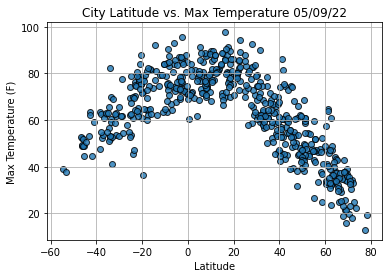

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

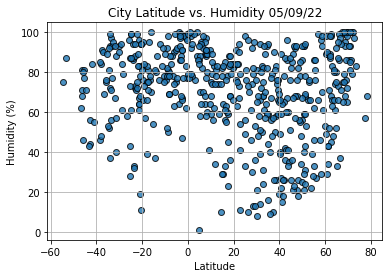

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

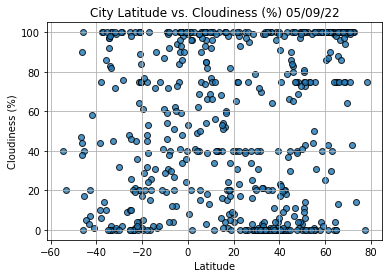

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

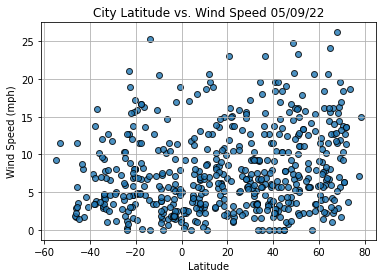

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [44]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [45]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Facaeni,RO,2022-05-10 04:30:26,44.5667,27.9000,55.76,51,30,2.84
3,College,US,2022-05-10 04:30:27,64.8569,-147.8028,37.58,92,75,8.05
7,Shahr-E Babak,IR,2022-05-10 04:30:28,30.1165,55.1186,68.38,8,0,6.35
11,Butaritari,KI,2022-05-10 04:30:30,3.0707,172.7902,81.50,76,41,17.02
13,Ponta Do Sol,PT,2022-05-10 04:30:31,32.6667,-17.1000,68.63,31,0,5.12


In [46]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

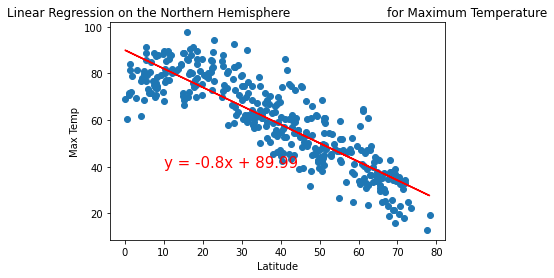

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


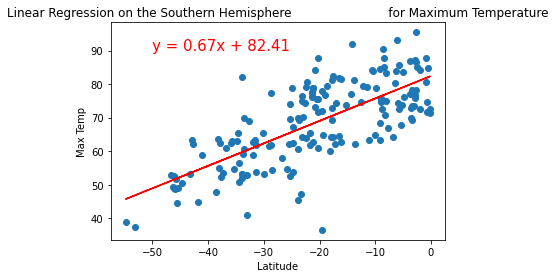

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


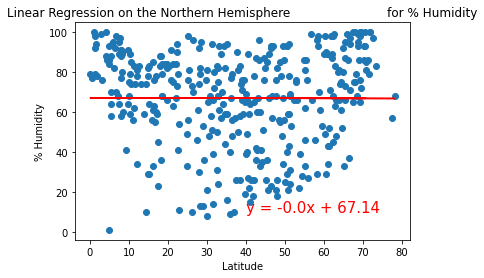

In [49]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

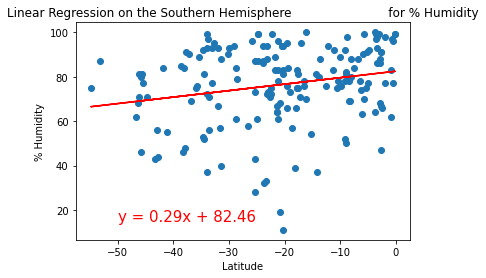

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

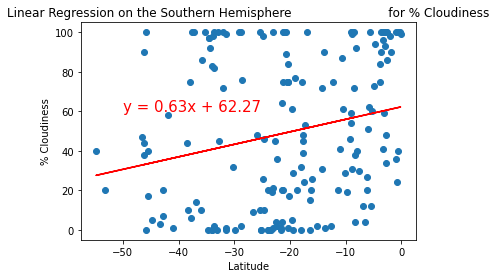

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

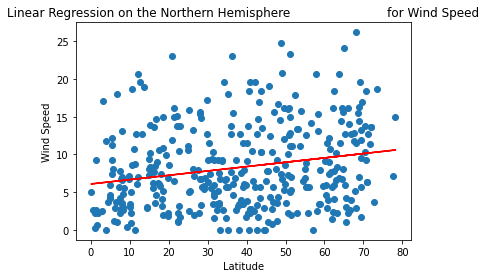

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


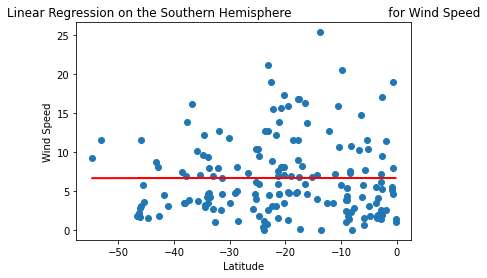

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
